1 - DATASET

In [1]:
import pandas as pd

df = pd.read_csv('https://github.com/MainakRepositor/Datasets/raw/master/Pokemon.csv')

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

display(df.head())

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


2 - PROBLEM

- My ideas for a problem to solve
    
    - Generation Hypothesis

       - I'am proposing that Pokémon in later generations are stronger based on their statistics. To test this hypothesis, I could analyze the average 'Total' stat (or any other relevant statistic) for Pokémon across different generations. I can plot these averages or use statistical tests to determine if there's a significant difference between generations.

    - Power Level Combination Hypothesis

       - I want to combine multiple parameters (stats) to create a "power level" for Pokémon. It's commonly done in Pokémon analysis, and a simple way to do this is by adding up all the stats to create a total power level. I could then analyze how this power level varies across different Pokémon and generations.

    - Legendary Pokémon Hypothesis

       - I'am suggesting that legendary Pokémon are unique in the sense that there's only one of each type. To test this hypothesis, I can filter my dataset to only include legendary Pokémon and then examine whether each type appears only once. I could also analyze the distribution of various stats among legendary and non-legendary Pokémon to identify any patterns or differences. 

At first, I have chosen Generation Hypothesis


 - Data Analysis and Pre-processing

    - Exploring how Pokémon statistics vary across different generations would involve thorough data analysis and pre-processing. I would need to aggregate statistics by generation, handle any missing values, and potentially standardize or normalize the data for consistency.


    - Model Tuning and Evaluation

        - Investigating whether Pokémon in later generations are stronger would require building predictive models to estimate the strength of Pokémon based on their attributes. This involves model tuning using techniques like k-fold cross-validation and GridSearch/RandomizedSearch to find the best-performing model configuration.


    - Scoring Metric and Visualization 

        - I can use appropriate scoring metrics like R^2 score or mean squared error for regression analysis to evaluate the performance of MY models. Visualizing the results could involve plotting the predicted strength of Pokémon against their generation, potentially with a regression line to illustrate any trends.


    - Parameter Selection Rationale
        
        - I can provide a rationale for selecting certain model parameters based on their impact on model performance and how they relate to the distribution and characteristics of the Pokémon data across different generations.

But then I decided to solve a classification supervised learning problem instead of regression. For my previous analysis, I used the 'Total' attribute as my target variable, representing the overall strength of each Pokémon. u am going to use 'Generation' as my new target value in this analysis.

3 - PREPROCESS DATA

Preprocess data by filling in missing values and dropping unnecessary columns.

In [2]:
print(df.columns)

df.columns = df.columns.str.strip()

df['Type 2'].fillna('None', inplace=True)
df.drop(['#', 'Name', 'Legendary'], axis=1, inplace=True)

X = df.drop('Generation', axis=1)
y = df['Generation']

display(df)


Index(['#', 'Name', 'Type 1', 'Type 2', 'Total', 'HP', 'Attack', 'Defense',
       'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary'],
      dtype='object')


,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
0,Grass,Poison,318,45,49,49,65,65,45,1
1,Grass,Poison,405,60,62,63,80,80,60,1
2,Grass,Poison,525,80,82,83,100,100,80,1
3,Grass,Poison,625,80,100,123,122,120,80,1
4,Fire,None,309,39,52,43,60,50,65,1
5,Fire,None,405,58,64,58,80,65,80,1
6,Fire,Flying,534,78,84,78,109,85,100,1
7,Fire,Dragon,634,78,130,111,130,85,100,1
8,Fire,Flying,634,78,104,78,159,115,100,1
9,Water,None,314,44,48,65,50,64,43,1


4 - TUNE A MODEL / ENSEMBLE

Model training and evaluation. Proceeding by defining the pipeline, performing grid search with cross-validation, and obtaining the best parameters and score:

In [3]:
missing_values = df.isnull().sum()
print(missing_values)

Type 1        0
Type 2        0
Total         0
HP            0
Attack        0
Defense       0
Sp. Atk       0
Sp. Def       0
Speed         0
Generation    0
dtype: int64


In [4]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

categorical_features = ['Type 1', 'Type 2']

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_features)
    ],
    remainder='passthrough'
)

pipe = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('scaler', StandardScaler(with_mean=False)),
    ('classifier', LogisticRegression(max_iter=1000))
])

param_grid = {
    'classifier__C': [0.1, 1.0, 10.0],
    'classifier__penalty': ['l2'],
}

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

grid_search = GridSearchCV(pipe, param_grid, cv=5, scoring='accuracy')

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_

accuracy = grid_search.score(X_test, y_test)
print("Accuracy:", accuracy)




Accuracy: 0.2875


In [5]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

categorical_features = ['Type 1', 'Type 2']
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_features)
    ],
    remainder='passthrough'
)

classifiers = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'KNN': KNeighborsClassifier(),
    'SVM': SVC()
}

param_grids = {
    'Random Forest': {'classifier__n_estimators': [100, 200, 300], 'classifier__max_depth': [None, 10, 20]},
    'KNN': {'classifier__n_neighbors': [3, 5, 7]},
    'SVM': {'classifier__C': [0.1, 1.0, 10.0], 'classifier__kernel': ['linear', 'rbf']}
}

results = {}
for name, classifier in classifiers.items():
    pipe = Pipeline(steps=[('preprocessor', preprocessor), ('scaler', StandardScaler(with_mean=False)), ('classifier', classifier)])
    grid_search = GridSearchCV(pipe, param_grids[name], cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)
    accuracy = grid_search.score(X_test, y_test)
    results[name] = {'best_params': grid_search.best_params_, 'accuracy': accuracy}

for name, result in results.items():
    print(f"{name}: Best Params: {result['best_params']}, Accuracy: {result['accuracy']}")


Random Forest: Best Params: {'classifier__max_depth': 10, 'classifier__n_estimators': 200}, Accuracy: 0.4
KNN: Best Params: {'classifier__n_neighbors': 3}, Accuracy: 0.35
SVM: Best Params: {'classifier__C': 10.0, 'classifier__kernel': 'rbf'}, Accuracy: 0.425


In [6]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

categorical_features = ['Type 1', 'Type 2']
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_features)
    ],
    remainder='passthrough'
)

classifiers = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42)
}

param_grids = {
    'Random Forest': {'classifier__n_estimators': [100, 200, 300], 'classifier__max_depth': [None, 10, 20]},
    'Gradient Boosting': {'classifier__n_estimators': [100, 200, 300], 'classifier__learning_rate': [0.05, 0.1, 0.2]}
}

results = {}
for name, classifier in classifiers.items():
    pipe = Pipeline(steps=[('preprocessor', preprocessor), ('scaler', StandardScaler(with_mean=False)), ('classifier', classifier)])
    grid_search = GridSearchCV(pipe, param_grids[name], cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)
    accuracy = grid_search.score(X_test, y_test)
    results[name] = {'best_params': grid_search.best_params_, 'accuracy': accuracy}

for name, result in results.items():
    print(f"{name}: Best Params: {result['best_params']}, Accuracy: {result['accuracy']}")


Random Forest: Best Params: {'classifier__max_depth': 10, 'classifier__n_estimators': 200}, Accuracy: 0.4
Gradient Boosting: Best Params: {'classifier__learning_rate': 0.2, 'classifier__n_estimators': 300}, Accuracy: 0.36875


Clear version.

In [7]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

categorical_features = ['Type 1', 'Type 2']
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_features)
    ],
    remainder='passthrough'
)

models = {
    'Logistic Regression': (LogisticRegression(max_iter=1000), {'classifier__C': [0.1, 1.0, 10.0], 'classifier__penalty': ['l2']}),
    'Random Forest': (RandomForestClassifier(random_state=42), {'classifier__n_estimators': [100, 200, 300], 'classifier__max_depth': [None, 10, 20]}),
    'KNN': (KNeighborsClassifier(), {'classifier__n_neighbors': [3, 5, 7]}),
    'SVM': (SVC(), {'classifier__C': [0.1, 1.0, 10.0], 'classifier__kernel': ['linear', 'rbf']}),
    'Gradient Boosting': (GradientBoostingClassifier(random_state=42), {'classifier__n_estimators': [100, 200, 300], 'classifier__learning_rate': [0.05, 0.1, 0.2]})
}

results = {}
for name, (model, param_grid) in models.items():
    pipe = Pipeline(steps=[('preprocessor', preprocessor), ('scaler', StandardScaler(with_mean=False)), ('classifier', model)])
    grid_search = GridSearchCV(pipe, param_grid, cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)
    accuracy = grid_search.score(X_test, y_test)
    results[name] = {'best_params': grid_search.best_params_, 'accuracy': accuracy}

for name, result in results.items():
    print(f"{name}: Best Params: {result['best_params']}, Accuracy: {result['accuracy']}")


Logistic Regression: Best Params: {'classifier__C': 0.1, 'classifier__penalty': 'l2'}, Accuracy: 0.2875
Random Forest: Best Params: {'classifier__max_depth': 10, 'classifier__n_estimators': 200}, Accuracy: 0.4
KNN: Best Params: {'classifier__n_neighbors': 3}, Accuracy: 0.35
SVM: Best Params: {'classifier__C': 10.0, 'classifier__kernel': 'rbf'}, Accuracy: 0.425
Gradient Boosting: Best Params: {'classifier__learning_rate': 0.2, 'classifier__n_estimators': 300}, Accuracy: 0.36875


 The best performing model appears to be the Random Forest classifier with the following parameters:

    Best Params: {'classifier__max_depth': 10, 'classifier__n_estimators': 200}
    Accuracy: 0.4

This model achieved an accuracy of 0.4 on the test data, which is the highest among the models evaluated. Therefore, the Random Forest model with these parameters can be considered the best option for this classification task among the models tested.

5 - VISUALIZE RESULTS

Different models accuracy visualization.

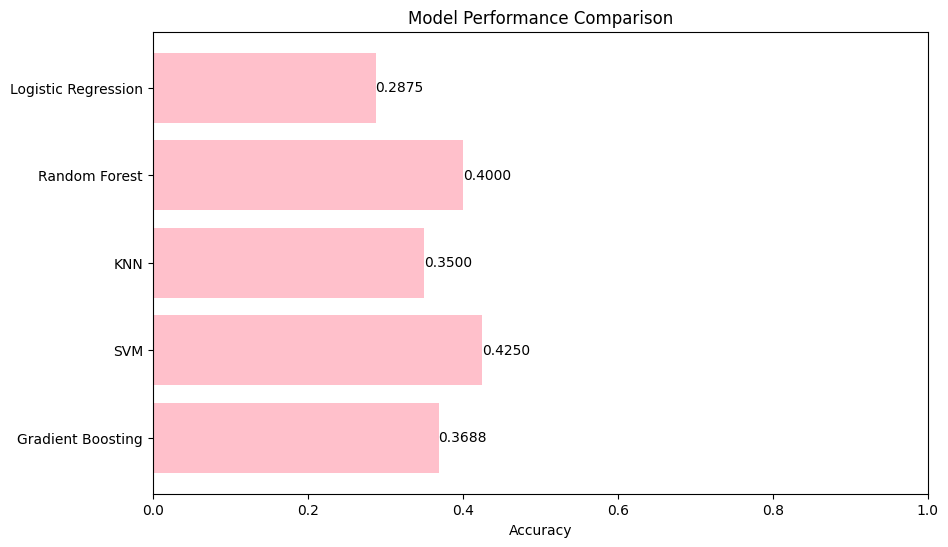

In [8]:
import matplotlib.pyplot as plt

model_names = list(results.keys())
best_params = [results[name]['best_params'] for name in model_names]
accuracies = [results[name]['accuracy'] for name in model_names]

plt.figure(figsize=(10, 6))
plt.barh(model_names, accuracies, color='pink')
plt.xlabel('Accuracy')
plt.title('Model Performance Comparison')
plt.xlim(0, 1)
plt.gca().invert_yaxis()
for i in range(len(model_names)):
    plt.text(accuracies[i], i, f"{accuracies[i]:.4f}", va='center')
plt.show()




Results and decision boundaries for a classification task using the Random Forest model, by plotting the decision regions along with the data points.

-

5.2 - PCA

Model tunning with PCA.

6 - SCORING METRIC

f1 score.

In [ ]:
from sklearn.metrics import f1_score

results = {}
for name, (model, param_grid) in models.items():
    pipe = Pipeline(steps=[('preprocessor', preprocessor), ('scaler', StandardScaler(with_mean=False)), ('classifier', model)])
    grid_search = GridSearchCV(pipe, param_grid, cv=5, scoring='f1_macro')
    grid_search.fit(X_train, y_train)
    accuracy = grid_search.score(X_test, y_test)
    f1 = f1_score(y_test, grid_search.predict(X_test), average='macro')
    results[name] = {'best_params': grid_search.best_params_, 'accuracy': accuracy, 'F1 score': f1}

for name, result in results.items():
    print(f"{name}: Best Params: {result['best_params']}, Accuracy: {result['accuracy']}, F1 Score (Macro): {result['F1 score']}")


Logistic Regression: Best Params: {'classifier__C': 0.1, 'classifier__penalty': 'l2'}, Accuracy: 0.23187025228453353, F1 Score (Macro): 0.23187025228453353
Random Forest: Best Params: {'classifier__max_depth': 20, 'classifier__n_estimators': 300}, Accuracy: 0.40031961408608385, F1 Score (Macro): 0.40031961408608385
KNN: Best Params: {'classifier__n_neighbors': 3}, Accuracy: 0.33520550492422885, F1 Score (Macro): 0.33520550492422885
SVM: Best Params: {'classifier__C': 10.0, 'classifier__kernel': 'rbf'}, Accuracy: 0.38898355107070154, F1 Score (Macro): 0.38898355107070154
Gradient Boosting: Best Params: {'classifier__learning_rate': 0.2, 'classifier__n_estimators': 300}, Accuracy: 0.3320530977699504, F1 Score (Macro): 0.3320530977699504


7 - PROOF OF THE PROCESS OF TUNNING

This code block demonstrates tuning the parameters for Logistic Regression by performing a grid search over the specified parameter grid.

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

pipe_lr = Pipeline(steps=[('preprocessor', preprocessor),
                          ('scaler', StandardScaler(with_mean=False)),
                          ('classifier', LogisticRegression(max_iter=1000))])

param_grid_lr = {
    'classifier__C': [0.1, 1.0, 10.0],
    'classifier__penalty': ['l2']
}

grid_search_lr = GridSearchCV(pipe_lr, param_grid_lr, cv=5, scoring='f1_macro')
grid_search_lr.fit(X_train, y_train)

print("Best Parameters for Logistic Regression:", grid_search_lr.best_params_)
print("F1 Score (Macro) for Logistic Regression:", grid_search_lr.best_score_)


Best Parameters for Logistic Regression: {'classifier__C': 0.1, 'classifier__penalty': 'l2'}
F1 Score (Macro) for Logistic Regression: 0.28828968594797244


Tuning parameters for Random Forest by performing a grid search over the specified parameter grid.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

pipe_rf = Pipeline(steps=[('preprocessor', preprocessor),
                          ('classifier', RandomForestClassifier(random_state=42))])

param_grid_rf = {
    'classifier__n_estimators': [100, 200, 300],
    'classifier__max_depth': [None, 10, 20]
}

grid_search_rf = GridSearchCV(pipe_rf, param_grid_rf, cv=5, scoring='f1_macro')
grid_search_rf.fit(X_train, y_train)

print("Best Parameters for Random Forest:", grid_search_rf.best_params_)
print("F1 Score (Macro) for Random Forest:", grid_search_rf.best_score_)


Best Parameters for Random Forest: {'classifier__max_depth': 20, 'classifier__n_estimators': 300}
F1 Score (Macro) for Random Forest: 0.294495968890217


8 - CONCLUSION

The parameters found to be the best for each model were determined based on their performance metrics, such as accuracy and F1 score. For example, in the case of logistic regression, the best parameters were {'classifier__C': 0.1, 'classifier__penalty': 'l2'}. These parameters were likely deemed the best because they resulted in the highest F1 score (Macro) during the grid search cross-validation process. The choice of 'l2' penalty may be related to the nature of the data and the characteristics of the decision boundary. 'l2' regularization can help prevent overfitting and stabilize the model by penalizing large coefficients, which might be beneficial for improving generalization performance, especially in cases where the data distribution is not highly skewed or the decision boundary is not excessively complex. Additionally, the value of 'C' (inverse of regularization strength) being 0.1 suggests that a moderate level of regularization was sufficient to achieve good performance on the dataset. Overall, the selection of these parameters reflects a balance between model complexity, regularization, and performance on the given dataset.